In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lteanalysis import LTEAnalysis
from matplotlib import cm

In [2]:
%matplotlib widget

In [9]:
def cost_function(T, N, X, Y, model,s1,s2):

    # print("printing params", params)
    N = N

    T = T

    X_predicted = model.get_intensity(line = 'c18o', Ju = 3, Ncol = N, Tex = T, delv = 0.5, Xconv = 1.e-7) # band 6
    Y_predicted = model.get_intensity(line = 'c18o', Ju = 2, Ncol = N, Tex = T, delv = 0.5, Xconv = 1.e-7) # band 7

    error = (X_predicted - X/s1)**2 + (Y_predicted - Y/s2)**2

    return error

In [10]:
def Log_Cosh_Loss(T, N, X, Y, model):

    N = N

    T = T

    X_predicted = model.get_intensity(line = 'c18o', Ju = 3, Ncol = N, Tex = T, delv = 0.5, Xconv = 1.e-7) # band 6
    Y_predicted = model.get_intensity(line = 'c18o', Ju = 2, Ncol = N, Tex = T, delv = 0.5, Xconv = 1.e-7) # band 7

    error = np.log10(np.cosh(X - X_predicted)) + np.log10(np.cosh(Y - Y_predicted))

    return error


In [11]:
T = np.linspace(1, 50, 200)
lg_N = np.linspace(12,28,1000)

tt, n = np.meshgrid(T,lg_N)
#print(T)
#print(10**(lg_N))

In [12]:
# ----- input -----
# for LTE calculation
line  = 'c18o'
Xconv = 1e-7
delv  = 0.5 # km/s
ilines = [3,2] # Ju
Ncols = np.array([5.e16, 5.9e16, 5.e17]) # cm^-2  
Texes = np.array([5, 18, 22, 30]) # K

# Initiate Model

lte_model = LTEAnalysis()
lte_model.read_lamda_moldata(line)

Z = np.zeros((len(T), len(lg_N)))
Z_log_loss = np.zeros((len(T), len(lg_N)))


for i in range(len(T)):

    for j in range(len(lg_N)):

        Z[i, j] = cost_function(T[i], 10**(lg_N[j]), X = 10.1, Y = 10., model = lte_model, s1=np.sqrt(1.01**2 + 1.01**2),
                                s2 = np.sqrt(1**2 + 0.49**2))
        Z_log_loss[i, j] = Log_Cosh_Loss(T[i], 10**(lg_N[j]), X = 10.1, Y = 10., model = lte_model)


In [13]:
min_idx_t, min_idx_n = np.where(Z == np.min(Z))
print(f"minimum value of cost function {np.min(Z):.2e}")

print(f"T = {T[min_idx_t[0]]:.1f} K")
print(f"N = {10**lg_N[min_idx_n[0]]: .2e} cm^{-2}")

print(lte_model.get_intensity(line = 'c18o', Ju = 3, Ncol = 10**lg_N[min_idx_n[0]], Tex = T[min_idx_t[0]], delv = 0.5, Xconv = 1.e-7))
print(lte_model.get_intensity(line = 'c18o', Ju = 2, Ncol = 10**lg_N[min_idx_n[0]], Tex = T[min_idx_t[0]], delv = 0.5, Xconv = 1.e-7))

minimum value of cost function 5.99e-02
T = 13.6 K
N =  9.27e+18 cm^-2
7.108370076288894
8.73804328217466


In [14]:
min_idx_t, min_idx_n = np.where(Z_log_loss == np.min(Z_log_loss))
print(f"minimum value of cost function {np.min(Z_log_loss):.2e}")

print(f"T = {T[min_idx_t[0]]:.1f} K")
print(f"N = {10**lg_N[min_idx_n[0]]: .2e} cm^{-2}")

print(lte_model.get_intensity(line = 'c18o', Ju = 3, Ncol = 10**lg_N[min_idx_n[0]], Tex = T[min_idx_t[0]], delv = 0.5, Xconv = 1.e-7))
print(lte_model.get_intensity(line = 'c18o', Ju = 2, Ncol = 10**lg_N[min_idx_n[0]], Tex = T[min_idx_t[0]], delv = 0.5, Xconv = 1.e-7))

minimum value of cost function 3.50e-04
T = 18.7 K
N =  5.42e+17 cm^-2
10.131680804875002
10.024636211041761


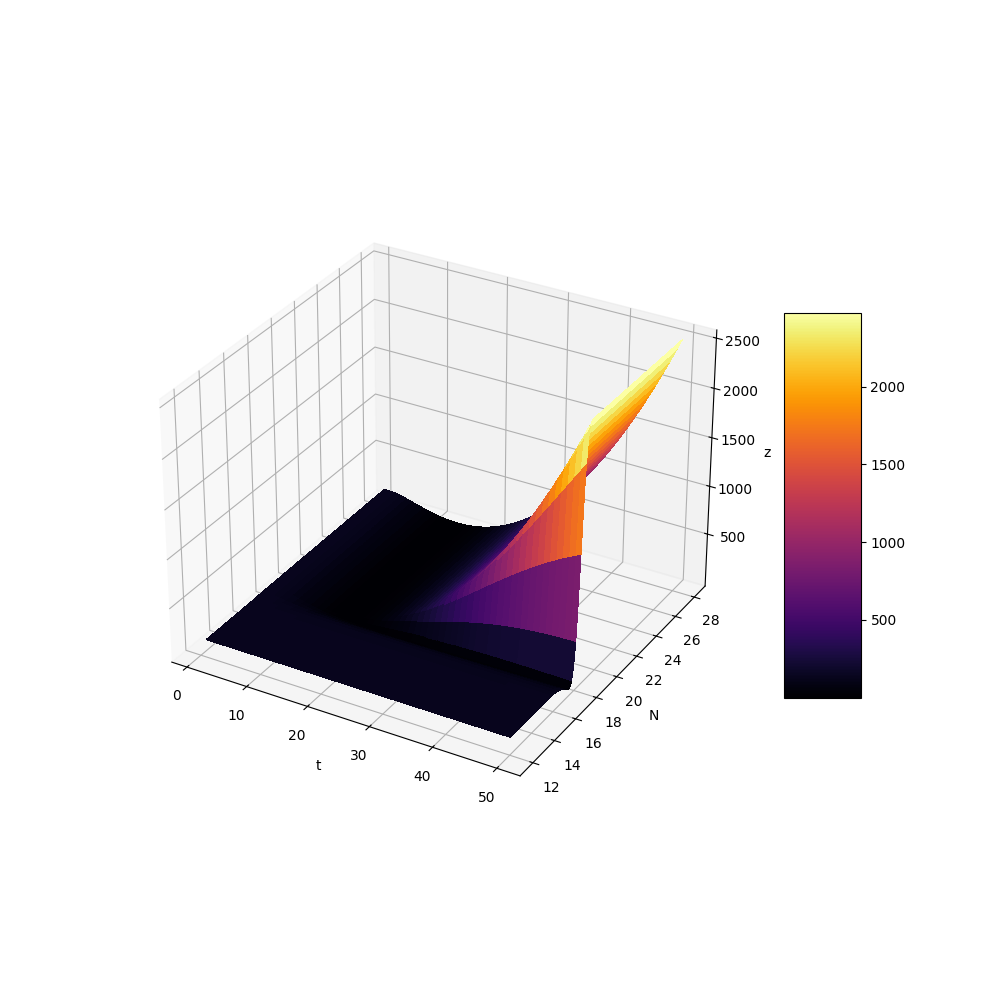

In [18]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

cp = ax.plot_surface(tt.T, n.T, Z, cmap=cm.inferno, linewidth=10, antialiased=False)
ax.set_xlabel('t')
ax.set_ylabel('N')
ax.set_zlabel('z')
#ax.set_ylim(-100,1000)
ax.set_zlim(-100,1000)
fig.colorbar(cp, shrink=0.5, aspect=5)
plt.show()

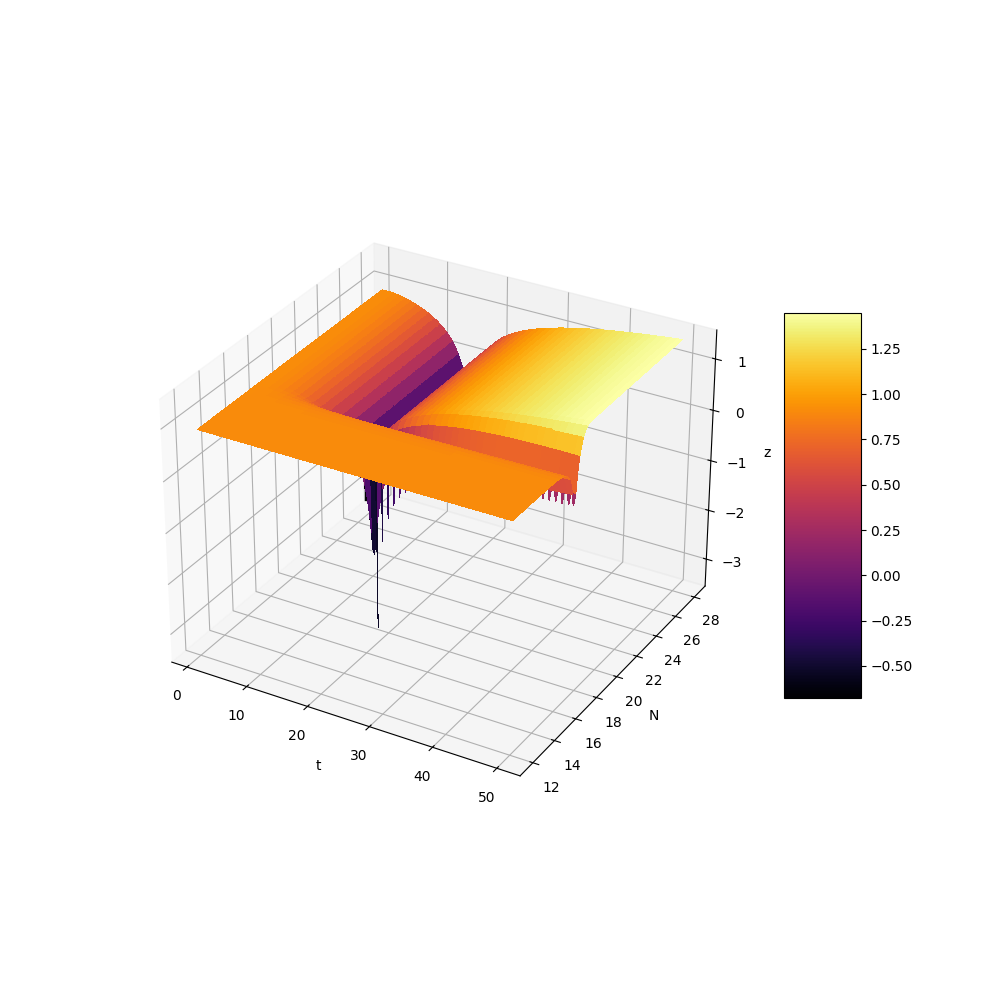

In [17]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

cp = ax.plot_surface(tt.T, n.T, np.log10(Z_log_loss), cmap=cm.inferno, linewidth=10, antialiased=False)
ax.set_xlabel('t')
ax.set_ylabel('N')
ax.set_zlabel('z')
# ax.set_zlim(-100,1000)
fig.colorbar(cp, shrink=0.5, aspect=5)
plt.show()